In [67]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import requests

In [68]:
def download_url(url, save_path, chunk_size=128):
    r = requests.get(url, stream=True)
    with open(save_path, 'wb') as fd:
        for chunk in r.iter_content(chunk_size=chunk_size):
            fd.write(chunk)

In [69]:
train_url = "https://raw.githubusercontent.com/sudhakarnraju/stockprice/master/Google_Stock_Price_Train.csv"
test_url = "https://raw.githubusercontent.com/raj-shah14/Predicting-Google-Stock-Prices/master/Google_Stock_Price_Test.csv"

In [70]:
os.makedirs('Dataset', exist_ok=True)
download_url(train_url, 'Dataset/Google_Stock_Price_Train.csv')
download_url(test_url, 'Dataset/Google_Stock_Price_Test.csv')

In [71]:
training_set = pd.read_csv('Dataset/Google_Stock_Price_Train.csv')
test_set = pd.read_csv('Dataset/Google_Stock_Price_Test.csv')

In [72]:
print(training_set.head())
print(test_set.head())

       Date    Open    High     Low   Close      Volume
0  1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1  1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2  1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3  1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4  1/9/2012  322.04  322.29  309.46  620.76  11,688,800
        Date    open    high      low   close   volume
0  3/15/2017  867.94  869.88  861.295  868.39  1331984
1  3/16/2017  870.53  872.71  867.520  870.00  1103990
2  3/17/2017  873.68  874.42  868.370  872.37  1852574
3  3/20/2017  869.48  870.34  864.665  867.91  1528664
4  3/21/2017  870.06  873.47  847.687  850.14  2531086


In [73]:
training_set = training_set.iloc[:, 1:2].values
test_set = test_set.iloc[:, 1:2].values

In [74]:
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [76]:
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [77]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [78]:
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 7s 48ms/step - loss: 0.0304
Epoch 2/100
38/38 [==============================] - 2s 47ms/step - loss: 0.0016
Epoch 3/100
38/38 [==============================] - 2s 48ms/step - loss: 0.0011
Epoch 4/100
38/38 [==============================] - 2s 49ms/step - loss: 0.0011
Epoch 5/100
38/38 [==============================] - 3s 80ms/step - loss: 0.0011
Epoch 6/100
38/38 [==============================] - 2s 53ms/step - loss: 0.0011
Epoch 7/100
38/38 [==============================] - 2s 49ms/step - loss: 0.0011
Epoch 8/100
38/38 [==============================] - 2s 48ms/step - loss: 0.0011
Epoch 9/100
38/38 [==============================] - 2s 49ms/step - loss: 0.0011
Epoch 10/100
38/38 [==============================] - 2s 49ms/step - loss: 0.0010
Epoch 11/100
38/38 [==============================] - 2s 62ms/step - loss: 9.8094e-04
Epoch 12/100
38/38 [==============================] - 3s 70ms/step - loss: 9.6294e-04
Epoch 13/100
38/3

In [81]:
dataset_total = pd.concat((pd.DataFrame(training_set), pd.DataFrame(test_set)), axis=0)
inputs = dataset_total[len(dataset_total) - len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 60 + len(test_set)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [82]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

7/7 [==============================] - 1s 15ms/step


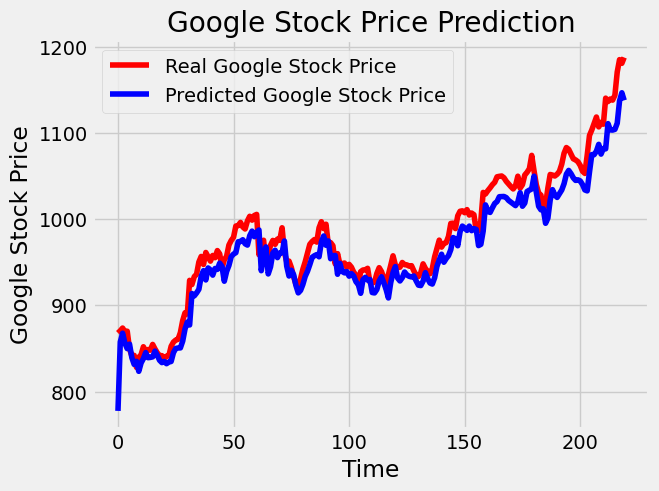

In [83]:
plt.plot(test_set, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [89]:
real_stock_price = test_set
inputs = real_stock_price
inputs = sc.transform(test_set)                   # feature scaling
inputs = np.reshape(inputs, (220, 1, 1))           # reshape the data
predicted_stock_price = model.predict(inputs)     # prediction

7/7 [==============================] - 0s 2ms/step
